In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("../data_files/clean/df_client_demo.csv")
df.head()


,client_id,client_tenure_year,client_tenure_month,client_age,gender,num_accounts,balance,calls_6_months,logons_6_months
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0


DEMOGRAPHICS
Who are the primary clients using this online process?

In [12]:
#dataframe clients who identified themselves as female
gender_f = df[df["gender"] == 'F']

round(gender_f.describe(),2)

,client_id,client_tenure_year,client_tenure_month,client_age,num_accounts,balance,calls_6_months,logons_6_months
count,22745.00,22745.00,22745.00,22745.00,22745.00,22745.00,22745.00,22745.00
mean,5001190.76,14.79,183.43,49.53,2.23,135565.42,3.09,5.29
std,2859252.05,6.46,77.25,14.71,0.51,240108.30,2.19,2.31
min,722.00,2.00,33.00,14.00,1.00,13789.42,0.00,1.00
25%,2532966.00,10.00,130.00,38.00,2.00,39120.21,1.00,3.00
50%,5029647.00,14.00,173.00,51.00,2.00,69028.90,3.00,5.00
75%,7450422.00,19.00,228.00,61.00,2.00,137880.16,5.00,7.00
max,9999839.00,62.00,749.00,96.00,8.00,8292996.21,7.00,9.00


In [14]:
#dataframe clients who identified themselves as male

gender_m = df[df["gender"] == 'M']
round(gender_m.describe(),2)

,client_id,client_tenure_year,client_tenure_month,client_age,num_accounts,balance,calls_6_months,logons_6_months
count,23724.00,23724.00,23724.00,23724.00,23724.00,23724.00,23724.00,23724.00
mean,5008599.17,14.88,184.37,48.58,2.33,212299.87,3.71,5.89
std,2884735.11,6.46,77.29,15.07,0.60,426402.83,2.23,2.36
min,169.00,2.00,33.00,14.00,2.00,13791.34,0.00,1.00
25%,2508500.25,10.00,130.00,36.00,2.00,43785.03,2.00,4.00
50%,5037623.50,14.00,174.00,50.00,2.00,85759.67,4.00,6.00
75%,7485849.00,19.00,230.00,60.00,3.00,205988.89,6.00,8.00
max,9999626.00,55.00,669.00,96.00,7.00,16320040.15,7.00,9.00


In [16]:
#filtered dataframe where we have gender information
gender_m_f = df[(df['gender'] == 'M') | (df['gender'] == 'F')]

,client_id,client_tenure_year,client_tenure_month,client_age,num_accounts,balance,calls_6_months,logons_6_months
count,46469.00,46469.00,46469.00,46469.00,46469.00,46469.00,46469.00,46469.00
mean,5004973.00,14.84,183.91,49.05,2.28,174740.96,3.41,5.59
std,2872261.76,6.46,77.27,14.91,0.56,350017.89,2.23,2.35
min,169.00,2.00,33.00,14.00,1.00,13789.42,0.00,1.00
25%,2522435.00,10.00,130.00,36.00,2.00,41333.51,1.00,4.00
50%,5033441.00,14.00,173.00,50.00,2.00,76424.67,3.00,6.00
75%,7468452.00,19.00,229.00,60.00,2.00,166115.18,6.00,7.00
max,9999839.00,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


In [56]:
# Number and ratio of gender of clients
gender_counts = df['gender'].value_counts()

# Calculate the ratio of M to F
if 'F' in gender_counts and gender_counts['F'] != 0:
    ratio_m_f = gender_counts['M'] / gender_counts['F']

gender_summary = pd.DataFrame({
    'Count M': [gender_counts.get('M', 0)],  # Get count of M (default to 0 if not present)
    'Count F': [gender_counts.get('F', 0)],  # Get count of F (default to 0 if not present)
    'Ratio (M:F)': [ratio_m_f]
})
print(f"Summary of clients which reported their gender:")
display(gender_summary)

#clients fairly evenly split between gender

Summary of clients which reported their gender:


,Count M,Count F,Ratio (M:F)
0,23724,22745,1.043042


In [63]:
#information about balance amounts

round(df['balance'].describe(), 2)

count       70594.00
mean       147446.73
std        301510.58
min         13789.42
25%         37346.60
50%         63334.59
75%        137546.12
max      16320040.15
Name: balance, dtype: float64

In [20]:
crosstab_result = pd.crosstab(df['gender'], df['balance'])


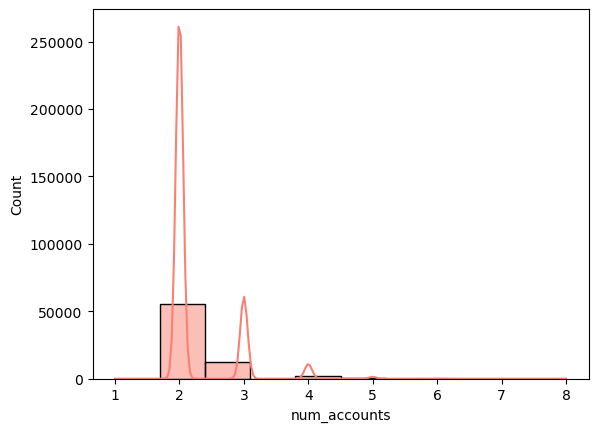

In [153]:
sns.histplot(df['num_accounts'], kde=True, bins=10, color="salmon");
#vast majority of clients have 2 accounts